In [32]:
import pandas as pd
import numpy as np
import datetime
import re
import random
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# KPEB1 데이터 추출

In [2]:
df_kpeb1 = pd.read_csv('./data/220114/220114 kpeb1.csv', parse_dates = True)

In [3]:
df_kpeb1['DateTime']= pd.to_datetime(df_kpeb1['DateTime'])

In [4]:
df_kpeb1=df_kpeb1[(df_kpeb1['DateTime']>='2021-09-13 00:00:00')]

In [5]:
df_kpeb1=df_kpeb1[(df_kpeb1['DateTime']<'2022-01-01 00:00:00')]

In [6]:
df_kpeb1=df_kpeb1.set_index('DateTime')

In [7]:
df_kpeb1=df_kpeb1.resample('1T').mean()

In [8]:
df_kpeb1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158400 entries, 2021-09-13 00:00:00 to 2021-12-31 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeatPump(W)           142393 non-null  float64
 1   Total_Consumption(W)  142393 non-null  float64
 2   Total_Production(W)   142393 non-null  float64
 3   Pv1_Supply(W)         142393 non-null  float64
 4   Pv2_Supply(W)         142393 non-null  float64
dtypes: float64(5)
memory usage: 7.3 MB


In [9]:
df_kpeb1=df_kpeb1.fillna(0)

In [10]:
df_kpeb1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158400 entries, 2021-09-13 00:00:00 to 2021-12-31 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeatPump(W)           158400 non-null  float64
 1   Total_Consumption(W)  158400 non-null  float64
 2   Total_Production(W)   158400 non-null  float64
 3   Pv1_Supply(W)         158400 non-null  float64
 4   Pv2_Supply(W)         158400 non-null  float64
dtypes: float64(5)
memory usage: 7.3 MB


In [11]:
df_kpeb1

,HeatPump(W),Total_Consumption(W),Total_Production(W),Pv1_Supply(W),Pv2_Supply(W)
DateTime,,,,,
2021-09-13 00:00:00,111.0,5695.0,0.0,0.0,0.0
2021-09-13 00:01:00,111.0,5284.0,0.0,0.0,0.0
2021-09-13 00:02:00,0.0,0.0,0.0,0.0,0.0
2021-09-13 00:03:00,110.0,5551.0,0.0,0.0,0.0
2021-09-13 00:04:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-12-31 23:55:00,292.0,7203.0,0.0,0.0,0.0
2021-12-31 23:56:00,291.0,8477.0,0.0,0.0,0.0
2021-12-31 23:57:00,291.0,9830.0,0.0,0.0,0.0


# KPEB2 데이터 추출

In [12]:
df_kpeb2 = pd.read_csv('./data/220114/220114 kpeb2.csv', parse_dates = True)

In [13]:
df_kpeb2['DateTime']= pd.to_datetime(df_kpeb2['DateTime'])

In [14]:
df_kpeb2=df_kpeb2[(df_kpeb2['DateTime']>='2021-09-13 00:00:00')]

In [15]:
df_kpeb2=df_kpeb2[(df_kpeb2['DateTime']<'2022-01-01 00:00:00')]

In [16]:
df_kpeb2=df_kpeb2.set_index('DateTime')

In [17]:
df_kpeb2=df_kpeb2.resample('1T').mean()

In [18]:
df_kpeb2=df_kpeb2.fillna(0)

In [19]:
df_kpeb2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158399 entries, 2021-09-13 00:01:00 to 2021-12-31 23:59:00
Freq: T
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Total_Consumption(W)  158399 non-null  float64
 1   Total_Production(W)   158399 non-null  float64
 2   Pvt_Supply(W)         158399 non-null  float64
 3   Pv1_Supply(W)         158399 non-null  float64
 4   Pv2_Supply(W)         158399 non-null  float64
dtypes: float64(5)
memory usage: 7.3 MB


In [20]:
df_kpeb2

,Total_Consumption(W),Total_Production(W),Pvt_Supply(W),Pv1_Supply(W),Pv2_Supply(W)
DateTime,,,,,
2021-09-13 00:01:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:02:00,0.0,0.0,0.0,0.0,0.0
2021-09-13 00:03:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:04:00,25.0,0.0,0.0,0.0,0.0
2021-09-13 00:05:00,24.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
2021-12-31 23:55:00,135.0,0.0,-65.0,0.0,0.0
2021-12-31 23:56:00,135.0,0.0,-66.0,0.0,0.0
2021-12-31 23:57:00,135.0,0.0,-66.0,0.0,0.0


# KPEB합치기

In [21]:
df_kpeb = pd.DataFrame()
df_kpeb = pd.DataFrame(pd.date_range('2021-09-13 00:00:00', '2021-12-31 23:59:00', freq='T'), columns=['Time'])

In [22]:
df_kpeb = df_kpeb.set_index('Time')

In [23]:
df_kpeb['Cons_kpeb(W)'] = df_kpeb1['Total_Consumption(W)']+df_kpeb2['Total_Consumption(W)']
df_kpeb['Prod_kpeb(W)'] = df_kpeb1['Total_Production(W)']+df_kpeb2['Total_Production(W)']

In [24]:
df_kpeb['Cons_acc_kpeb(Wh)'] = df_kpeb['Cons_kpeb(W)'].cumsum()*60*1/3600
df_kpeb['Prod_acc_kpeb(Wh)'] = df_kpeb['Prod_kpeb(W)'].cumsum()*60*1/3600

In [25]:
df_kpeb['denominator'] = df_kpeb.loc[:,['Cons_kpeb(W)','Prod_kpeb(W)']].min(axis=1)
df_kpeb['denominator_acc'] = df_kpeb.loc[:,['Cons_acc_kpeb(Wh)','Prod_acc_kpeb(Wh)']].min(axis=1)

In [26]:
df_kpeb['SCF'] = df_kpeb['denominator']/df_kpeb['Prod_kpeb(W)']
df_kpeb['LCF'] = df_kpeb['denominator']/df_kpeb['Cons_kpeb(W)']

In [27]:
df_kpeb['SCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Prod_acc_kpeb(Wh)']
df_kpeb['LCF_acc'] = df_kpeb['denominator_acc']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['self_sustain'] = df_kpeb['Prod_acc_kpeb(Wh)']/df_kpeb['Cons_acc_kpeb(Wh)']
df_kpeb['Avg_SCF&LCF'] = (df_kpeb['SCF_acc']+df_kpeb['LCF_acc'])/2

In [28]:
df_kpeb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158400 entries, 2021-09-13 00:00:00 to 2021-12-31 23:59:00
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Cons_kpeb(W)       158399 non-null  float64
 1   Prod_kpeb(W)       158399 non-null  float64
 2   Cons_acc_kpeb(Wh)  158399 non-null  float64
 3   Prod_acc_kpeb(Wh)  158399 non-null  float64
 4   denominator        158399 non-null  float64
 5   denominator_acc    158399 non-null  float64
 6   SCF                72680 non-null   float64
 7   LCF                143095 non-null  float64
 8   SCF_acc            158395 non-null  float64
 9   LCF_acc            158399 non-null  float64
 10  self_sustain       158399 non-null  float64
 11  Avg_SCF&LCF        158395 non-null  float64
dtypes: float64(12)
memory usage: 15.7 MB


In [29]:
df_kpeb

,Cons_kpeb(W),Prod_kpeb(W),Cons_acc_kpeb(Wh),Prod_acc_kpeb(Wh),denominator,denominator_acc,SCF,LCF,SCF_acc,LCF_acc,self_sustain,Avg_SCF&LCF
Time,,,,,,,,,,,,
2021-09-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-13 00:01:00,5309.0,0.0,8.848333e+01,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:02:00,0.0,0.0,8.848333e+01,0.000000e+00,0.0,0.000000e+00,NaN,NaN,NaN,0.000000,0.000000,NaN
2021-09-13 00:03:00,5576.0,0.0,1.814167e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
2021-09-13 00:04:00,25.0,0.0,1.818333e+02,0.000000e+00,0.0,0.000000e+00,NaN,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00,7338.0,0.0,2.395308e+07,1.380652e+07,0.0,1.380652e+07,NaN,0.0,1.0,0.576398,0.576398,0.788199
2021-12-31 23:56:00,8612.0,0.0,2.395322e+07,1.380652e+07,0.0,1.380652e+07,NaN,0.0,1.0,0.576395,0.576395,0.788197
2021-12-31 23:57:00,9965.0,0.0,2.395339e+07,1.380652e+07,0.0,1.380652e+07,NaN,0.0,1.0,0.576391,0.576391,0.788195


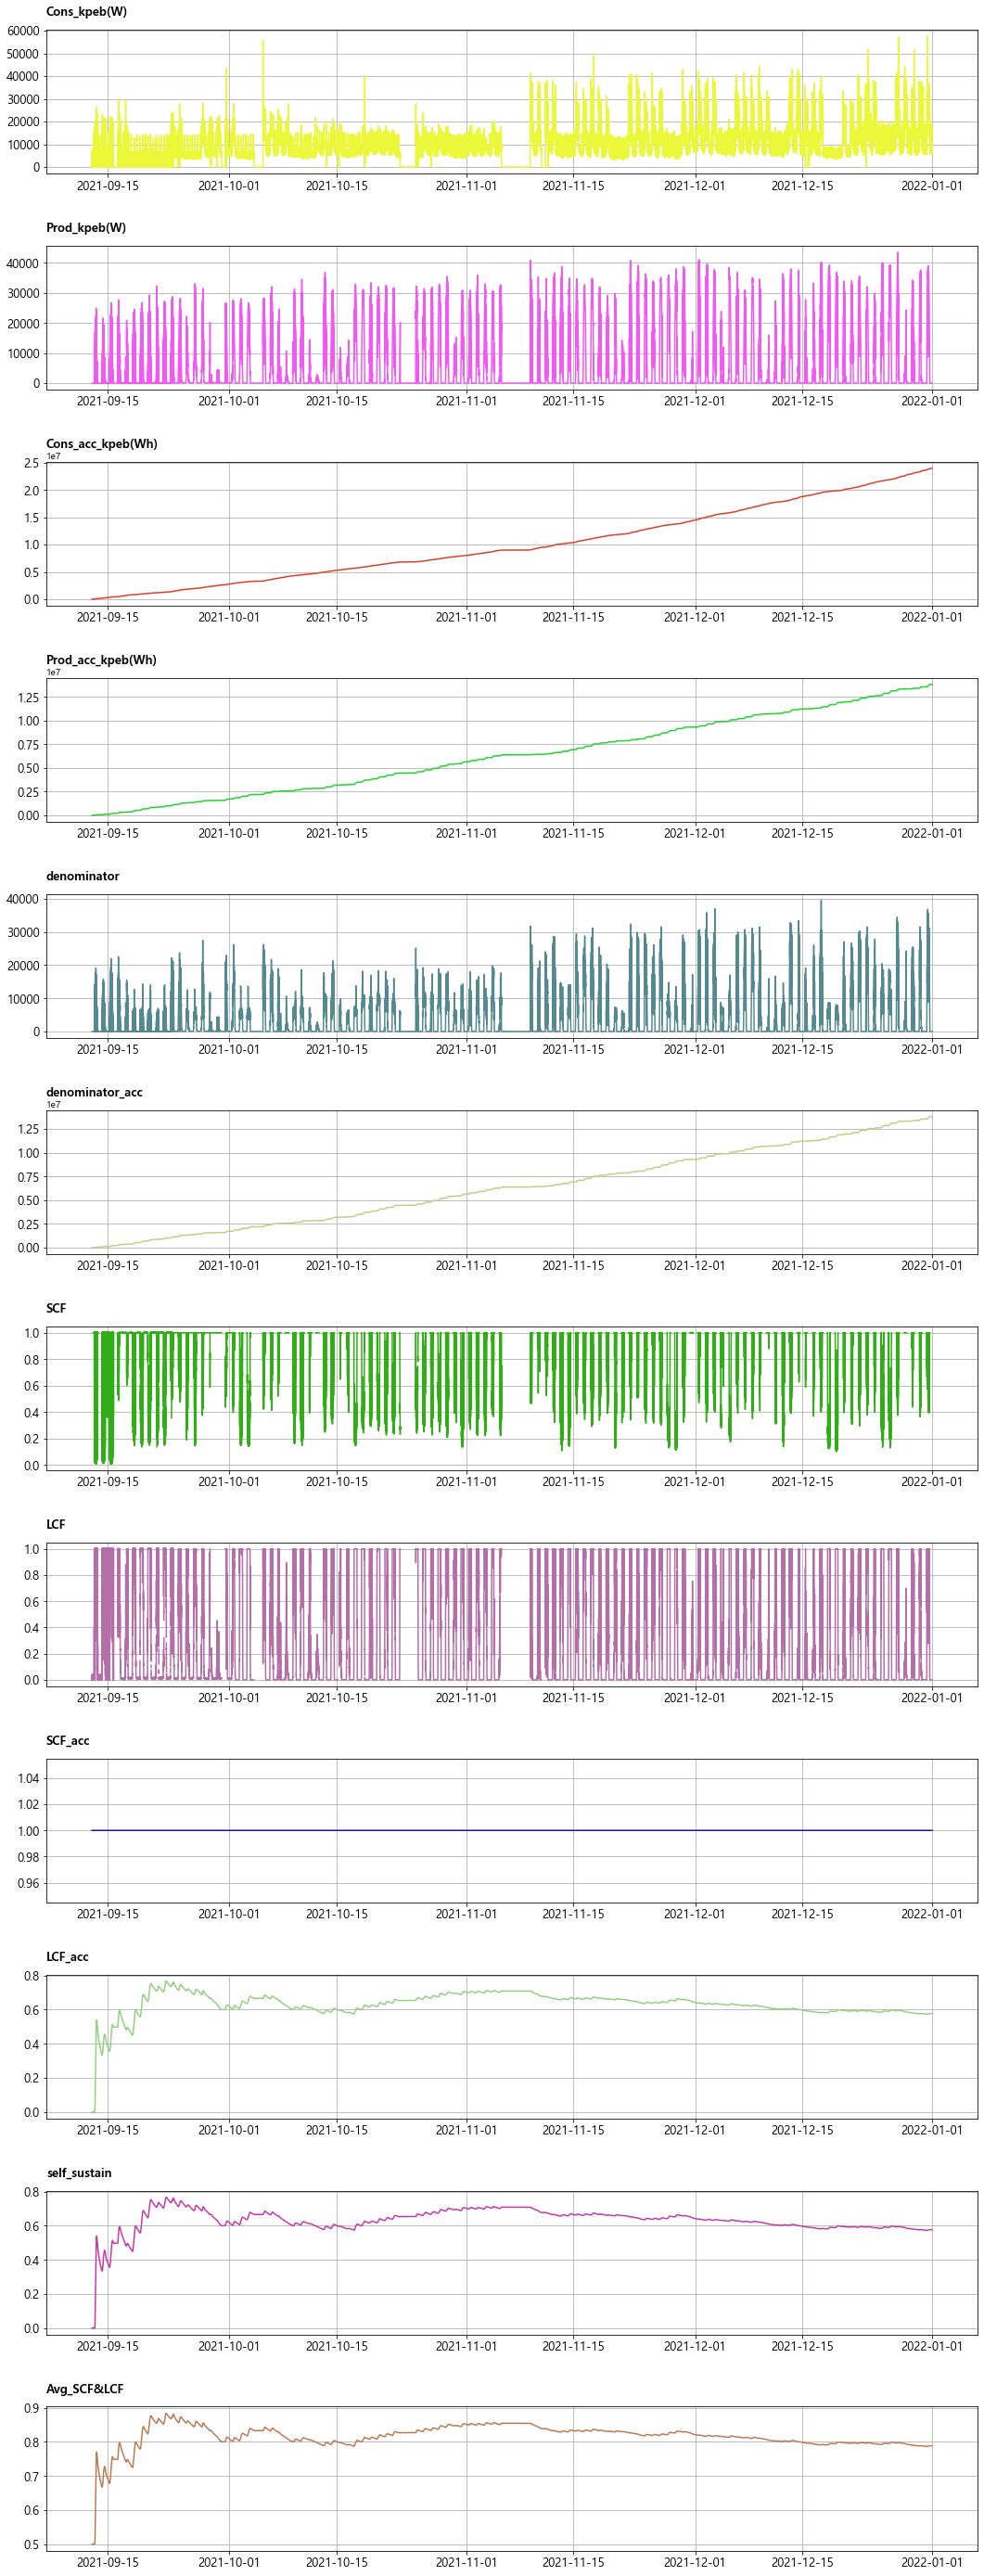

In [33]:
fig, ax = plt.subplots(figsize=(18,50))

for i in range(len(df_kpeb.columns)):
    plt.subplot(len(df_kpeb.columns), 1, i+1)
    plt.subplots_adjust(hspace=0.5)
    name = df_kpeb.columns[i]
    r=random.random()
    g=random.random()
    b=random.random()
    color=(r,g,b)
    plt.plot(df_kpeb[name], color=color)    
    plt.title(name, loc = 'left', pad=15, fontsize=13, fontweight="bold")      
    plt.yticks(fontsize=13)    
    plt.xticks(fontsize=13)                
    plt.xlim(pd.Timestamp('2021-09-07'), pd.Timestamp('2022-01-07'))    
    plt.grid(True)
plt.show()
fig.tight_layout()

In [ ]:
df_kpeb.to_csv('./210913~211103_kpeb1&2_ver2.csv')